In [55]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fft import fft, fftfreq
from scipy.stats import iqr

In [56]:
data = loadmat('BFVdata_assignment3.mat')

In [57]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'BFV_Fs', 'BFVdu'])

In [58]:
BFVdu = data['BFVdu'].flatten()
BFV_Fs = data['BFV_Fs'].flatten()[0]

In [59]:
pd.Series(BFVdu).describe()

count    1000.000000
mean        0.521637
std         0.061287
min         0.451000
25%         0.483176
50%         0.495459
75%         0.538815
max         0.722000
dtype: float64

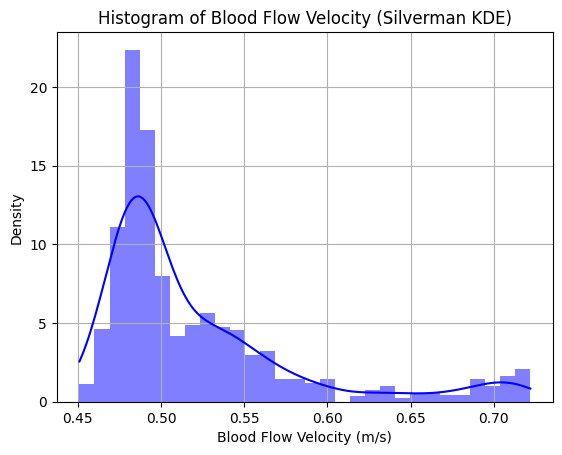

In [64]:
sns.histplot(BFVdu, kde=True, bins=30, color='blue', stat='density', linewidth=0)
plt.title("Histogram of Blood Flow Velocity (Silverman KDE)")
plt.xlabel("Blood Flow Velocity (m/s)")
plt.ylabel("Density")
plt.grid(True)
plt.show()

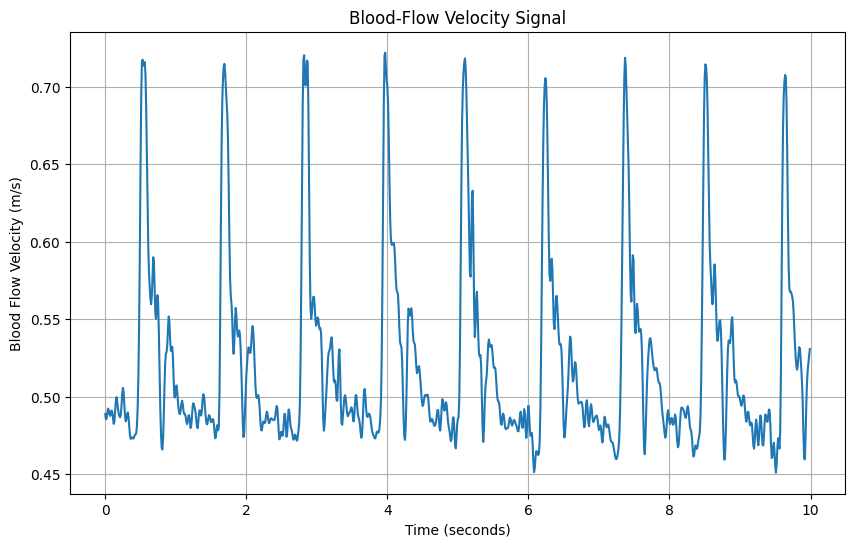

In [45]:
# Plot the blood-flow velocity signal
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(BFVdu)) / BFV_Fs, BFVdu)  # Time axis based on sampling rate
plt.title("Blood-Flow Velocity Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Blood Flow Velocity (m/s)")
plt.grid(True)
plt.show()

In [65]:
fft_BFVdu = fft(BFVdu)
frequencies = fftfreq(len(BFVdu), 1 / BFV_Fs)
magnitude_BFVdu = np.abs(fft_BFVdu)

Text(0, 0.5, 'Magnitude')

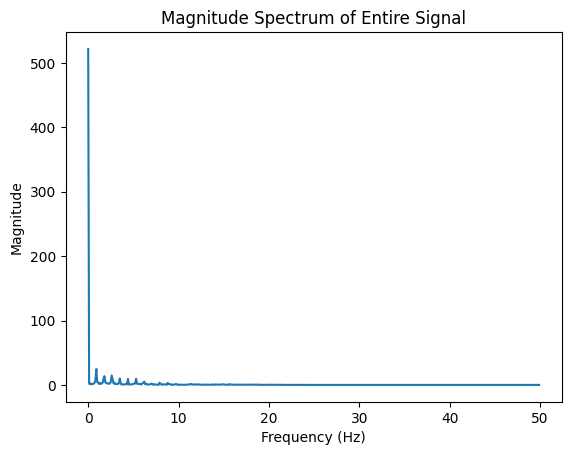

In [67]:
plt.plot(frequencies[:len(BFVdu) // 2], magnitude_BFVdu[:len(BFVdu) // 2])  # we're only plotting positive omegas here
plt.title("Magnitude Spectrum of Entire Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")